# Gaussian beam in resonator #

This is a demonstration file for PH455/957. The file demonstrates the implementation of Gaussian beam that passes through an optical cavity.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import PH455

(1) Define initial Gaussian beam. Provide W1, R1 and calculate q1

In [4]:
lam = 700e-9 * 1000    # wavelength in mm
R1  = 50               # Radius of curvature of beam in mm
W1  = 2                # Waist in mm
z1  = -10               # Position in mm   

# calculate q1 using W1, R1
invQ = 1/R1 - 1j *lam / (np.pi*W1**2)
q1   = 1/invQ

(2) Define the ABCD matrices for the cavity. 

- This is a free space propagation by distance d,
- a reflection from mirror 2 with radius RM2,
- another free space propagation (identical to the first),
- and a reflection from mirror 1 with radius of curvature RM1.

For an easier illustration at the end of the script, I split the free space propagation into 10 steps, i.e. d/10.

In [6]:
# mirror 1 (on the left)
RM1 = -5                      # radius of curvature mirror 1
# mirror 2 (on the right)
RM2 = -5                      # radius of curvature mirror 2

# cavity length in mm
d   = 8 
NSteps = 10                   # number of steps 
dStep = d/NSteps              # step length (fraction of cavity length)

# free space
M1  = np.array( [[1,dStep],[0,1]] )

# reflection mirror Mirror 2
M2  = np.array( [[1,0],[2/RM2,1]] ) 

# reflection mirror Mirror 1
M4  = np.array( [[1,0],[2/RM1,1]] ) 

(3) Propagate the beam through the system qVect and zVect are lists that keep track of the q-parameters at the z positions.

In [8]:
# initialize position and parameter vectors
qVect  = [q1]
zVect  = [z1]

# one cycle of beam through the cavity, implement the 4 steps
# with the ABCD matrices

#propagate in space
for i2 in range(NSteps):
    q1 = qVect[-1]
    z1 = zVect[-1]
    
    q2 = (M1[0][0]*q1 + M1[0][1]) / (M1[1][0]*q1 + M1[1][1])
    z2 = z1 + d/10
    
    qVect.append( q2 )
    zVect.append( z2)

# mirror 2
q1 = qVect[-1]
z1 = zVect[-1]
q2 = (M2[0][0]*q1 + M2[0][1]) / (M2[1][0]*q1 + M2[1][1])
qVect.append( q2 )
zVect.append( z1 )
    
#propagate in space
for i2 in range(NSteps):
    q1 = qVect[-1]
    z1 = zVect[-1]
    q2 = (M1[0][0]*q1 + M1[0][1]) / (M1[1][0]*q1 + M1[1][1])
    z2 = z1 + d/10
    qVect.append( q2 )
    zVect.append( z2)


# mirror 1
q1 = qVect[-1]
z1 = zVect[-1]
q2 = (M2[0][0]*q1 + M2[0][1]) / (M2[1][0]*q1 + M2[1][1])
qVect.append( q2 )
zVect.append( z1 )

(4) Plot the beam 

The function "showBeam( zVec, beamVect, lambda )" is a simple plotting function in the support module PH455.

- horizontal gray line - optical axis
- red circles - y-positions of beam width
- blue lines - radius of curvature of wavefronts
- dashed red lines - connection of width values

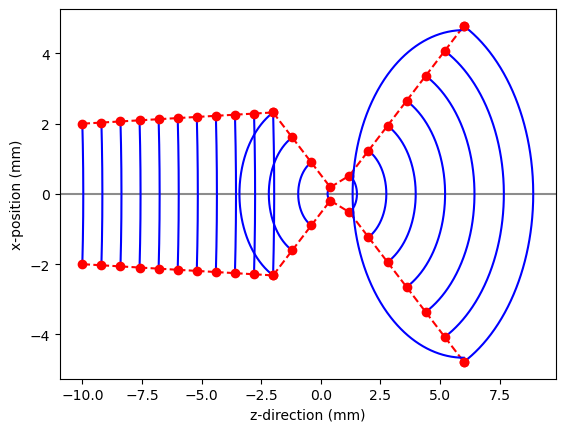

In [10]:
PH455.showBeam( zVect, qVect, lam )